<a href="https://colab.research.google.com/github/StepanVecera/MPC-MLF/blob/main/12022024cv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#12.2.2024
#SVM (support vector machine) coz jsou labiny 3, ale marsalOSS to zmenil, protoze je frajer a muze
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print('iris names', iris.feature_names)
print('iris data', iris.data[0:5,:])
print('iris target', iris.target[0:5]) #print(iris.data)

iris names ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris data [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
iris target [0 0 0 0 0]


Split data into training and testing parts:

In [ ]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print('x_train_shape', X_train.shape)
print('x_test_shape', X_test.shape)
#print(y_test)

x_train_shape (120, 4)
x_test_shape (30, 4)


Use a Support Vector Machine for classification:

In [ ]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train) #training the svm
SVMmodel.get_params()
SVMmodel.score(X_test,y_test) #testing the svm

1.0


Let's explore more now.

  Choose only first two features (columns) of iris.data
  
  SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data

In [ ]:
import pandas as pd

X = iris.data[iris.target!=2, 0:2]
y = iris.target[iris.target!=2]
#df = pd.DataFrame(iris.data)
#df.drop(columns=df.columns[-2:], axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print('x_train_shape', X_train.shape)
print('x_test_shape', X_test.shape)
print(y_test)


x_train_shape (80, 2)
x_test_shape (20, 2)
[0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0]


plotting data

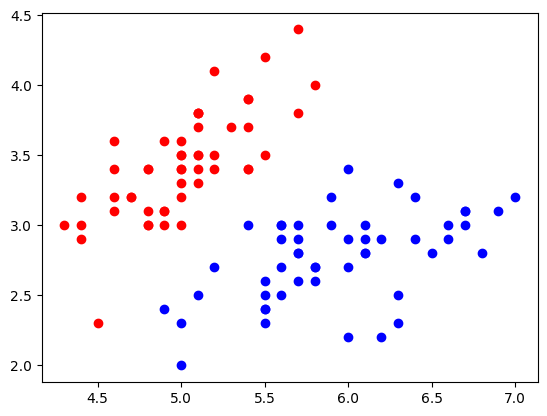

In [ ]:
import matplotlib.pyplot as plt
#plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X[y==1, 0], X[y==1, 1], color = 'blue')
plt.scatter(X[y==0, 0], X[y==0, 1], color = 'red')

Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [ ]:
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train) #training the svm
SVMmodel.get_params()
SVMmodel.score(X_test,y_test) #testing the svm

1.0

Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

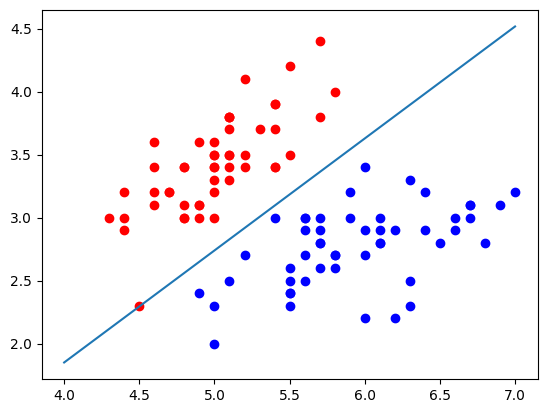

In [ ]:
import numpy as np

supvectors=SVMmodel.support_vectors_
#plt.plot(supvectors)
#Separating line coefficients:

W=SVMmodel.coef_
b=SVMmodel.intercept_

plt.scatter(X[y==1, 0], X[y==1, 1], color = 'blue')
plt.scatter(X[y==0, 0], X[y==0, 1], color = 'red')

#tedka nakreslit rozhodovaci lajnu
#w0*x0+w1*x1+b = 0
#x1 = ....
x0 = np.linspace(4, 7, num=10)
#x0 = np.linspace(min(X[0, :]), max(X[1, :]), 100)
#print(x0)
x1 = ((-b) - (W[0, 0]*x0))/W[0, 1]
plt.plot(x0, x1)

#print('W', W)
#print('b', b)

Anomaly detection via SVM
Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

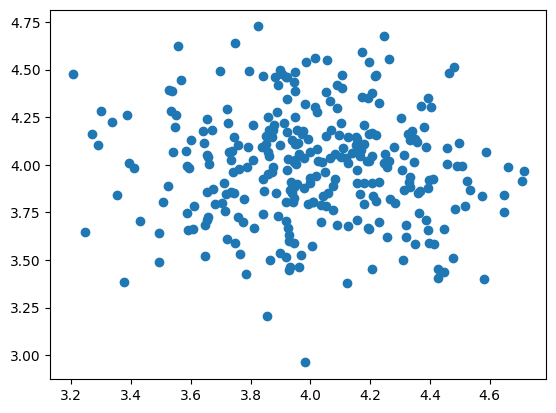

In [ ]:

from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random
random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))
plt.scatter(x[:,0], x[:,1])
plt.show()

Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

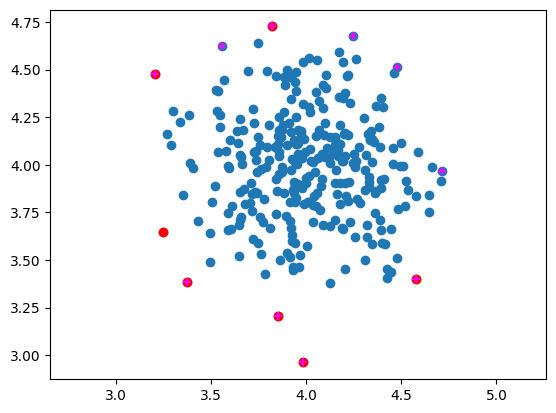

In [ ]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)
SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
#print(pred)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
supvectors2 = SVMmodelOne.support_vectors_
plt.scatter(supvectors2[:, 0], supvectors2[:, 1], color = 'magenta', marker ='+')
plt.show()



What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.99269220494228


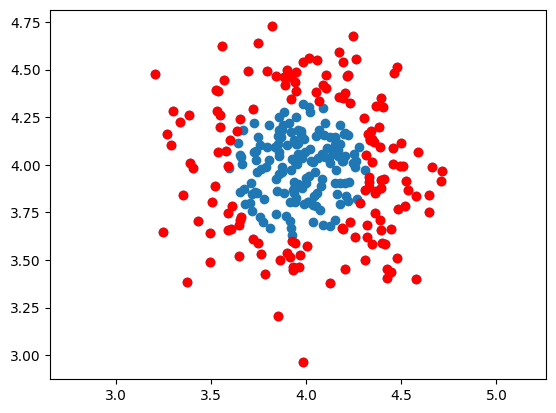

In [ ]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, .5) #0.5 = pulka
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()